In [1]:
# Instalando librerias y dependencias

import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import os

*   Función para arreglar fecha y cambiarla a datetime (se devuelve la cadena)
*   Definicion de elemento vacio

In [2]:
# Funcion para arreglar fechas:
from datetime import datetime

def fecha(cadena):
  return datetime.fromisoformat(cadena[0:19])

#Prueba:
cadena = "2023-06-23T12:57:22-06:00"
print(fecha(cadena))

# Elemento vacio
nada = None

2023-06-23 12:57:22


### urls base

In [3]:
url_base = ["https://diariolatino.net/"]

# Numero de paginas a extraer
paginas = 30

for i in range(paginas):
    if i == 0:
      pass
    else:
      extra = "page/"+str(i+1)+'/'
      url_base.append(url_base[0]+extra)

print(url_base)

['https://diariolatino.net/', 'https://diariolatino.net/page/2/', 'https://diariolatino.net/page/3/', 'https://diariolatino.net/page/4/', 'https://diariolatino.net/page/5/', 'https://diariolatino.net/page/6/', 'https://diariolatino.net/page/7/', 'https://diariolatino.net/page/8/', 'https://diariolatino.net/page/9/', 'https://diariolatino.net/page/10/', 'https://diariolatino.net/page/11/', 'https://diariolatino.net/page/12/', 'https://diariolatino.net/page/13/', 'https://diariolatino.net/page/14/', 'https://diariolatino.net/page/15/', 'https://diariolatino.net/page/16/', 'https://diariolatino.net/page/17/', 'https://diariolatino.net/page/18/', 'https://diariolatino.net/page/19/', 'https://diariolatino.net/page/20/', 'https://diariolatino.net/page/21/', 'https://diariolatino.net/page/22/', 'https://diariolatino.net/page/23/', 'https://diariolatino.net/page/24/', 'https://diariolatino.net/page/25/', 'https://diariolatino.net/page/26/', 'https://diariolatino.net/page/27/', 'https://diariol

* Extracción de urls y títulos
* Eliminación de repetidos

In [4]:
# Recorriendo url_base, buscamos los urls de cada noticia y otros elementos

elementos_temp = []

for url in url_base:
    try:
        response = requests.get(url)

        # Verifica si la solicitud fue exitosa (código de estado 200)
        response.raise_for_status()

        contenido_html = response.text
        soup = BeautifulSoup(contenido_html, 'html.parser')

        for post in soup.select('h3', class_='entry-title td-module-title'):
            # Extracción de URL y título
            if post.find('a'):
                url_tem = post.find('a').get('href')
                title_tem = post.text.strip()
                elementos_temp.append((url_tem, title_tem))
            else:
                pass

    except requests.RequestException as e:
        # Manejar cualquier error relacionado con la solicitud (por ejemplo, conexión fallida)
        print(f"No se pudo obtener la página. URL: {url}, Error: {e}")
    except Exception as e:
        # Manejar cualquier otro tipo de error
        print(f"Ocurrió un error inesperado: {e}")

n = len(set(elementos_temp))

# Quitando urls repetidas
indice = 0
while indice < n:
    elemento_actual = elementos_temp[indice]
    if elementos_temp.count(elemento_actual) > 1:
        elementos_temp.remove(elemento_actual)
    else:
        indice += 1

print(elementos_temp)
print(len(elementos_temp))

[('https://diariolatino.net/acusan-a-gobierno-de-el-salvador-de-mantener-secuestrado-a-exministro-de-seguridad/', 'Acusan a Gobierno de El Salvador de mantener «secuestrado» a exministro de Seguridad'), ('https://diariolatino.net/bukele-sin-sudar-la-camiseta-y-con-el-unico-exito-de-su-gobierno-se-encamina-a-la-reeleccion/', 'Bukele, sin «sudar la camiseta» y con el único “éxito” de su gobierno se encamina a la reelección'), ('https://diariolatino.net/plan-fin-de-ano-2023-no-logra-detener-alto-numero-de-victimas-durante-fiestas/', 'Plan Fin de Año 2023 no logra detener alto número de víctimas durante fiestas'), ('https://diariolatino.net/una-entrevista-inedita-de-gabriel-garcia-marquez/', 'Una entrevista inédita de Gabriel García Márquez'), ('https://diariolatino.net/descubren-una-pintura-inedita-de-rafael-en-una-coleccion-privada/', 'Descubren una pintura inédita de Rafael en una colección privada'), ('https://diariolatino.net/el-reino-unido-advirtio-a-venezuela-que-cese-sus-acciones-i

* Registro de: url, title
* Extracción de: author, content, publication_date, category_id

In [5]:
# Hay que llenar estas listas para el dataframe

author = []
title = []
content = []
date = []
url = []
category = []
sourse = []
type_ = []

for elemento in elementos_temp:
    new = elemento[0]

    try:
        response = requests.get(new)

        # Verifica si la solicitud fue exitosa (código de estado 200)
        response.raise_for_status()

        # Registro de URL
        url.append(new)

        # Registro del título
        title.append(elemento[1])

        # La sopa
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracción del autor
        author_element = soup.select_one("div.td-post-author-name")
        author.append(author_element.text.strip().replace("By ", "").replace(" -", "") if author_element else nada)

        # Extracción de la fecha de publicación
        date_element = soup.find('time')
        date.append(fecha(date_element['datetime']) if date_element else nada)

        # Extracción del contenido
        content_elements = soup.select('p')
        content_text = ' '.join(element.text.strip() for element in content_elements) if content_elements else nada
        content_text = content_text.replace("\n", " ").replace("\t", " ").replace("\xa0", " ")
        content.append(content_text)

        # Extracción de la categoría
        category_elements = soup.find("ul", class_="td-category")
        category_text = ' '.join(element.text.strip() for element in category_elements) if category_elements else nada
        category.append(category_text.replace("Hoy ", ""))

    except requests.RequestException as e:
        # Cualquier error relacionado con la solicitud (por ejemplo, conexión fallida)
        print(f"No se pudo obtener la página. URL: {new}, Error: {e}")
    except Exception as e:
        # Cualquier otro tipo de error
        print(f"Ocurrió un error inesperado: {e}")
        # Se elimina ese elemento de la data
        for lista in [author, title, content, date, url, category]:
            if len(lista) > len(category):
                lista.pop()
            else:
                pass

Ocurrió un error inesperado: 'NoneType' object has no attribute 'replace'


* DataFrame
* Registro de: sourse_id, sourse_type

In [6]:
# Haciendo el dataframe
data= pd.DataFrame({'author_id': author,'title': title, "content": content, 'publication_date': date, 'url': url, 'category_id': category})

# Registro de fuente
data["sourse_id"]= "Diario Latino"

# Registro de tipo de fuente
data["sourse_type"]= 'Web Page'

data.head()

,author_id,title,content,publication_date,url,category_id,sourse_id,sourse_type
0,Redacción DL,Acusan a Gobierno de El Salvador de mantener «...,La Fiscalía atribuye a Mauricio Ramírez Landav...,2023-12-29 09:31:35,https://diariolatino.net/acusan-a-gobierno-de-...,Nacionales,Diario Latino,Web Page
1,Redacción DL,"Bukele, sin «sudar la camiseta» y con el único...",A pesar que la candidatura que Nayib Bukele ut...,2023-12-29 07:52:51,https://diariolatino.net/bukele-sin-sudar-la-c...,Mirador Político,Diario Latino,Web Page
2,Redacción DL,Plan Fin de Año 2023 no logra detener alto núm...,La Policía Nacional Civil (PNC) informó que de...,2023-12-29 07:46:09,https://diariolatino.net/plan-fin-de-ano-2023-...,Nacionales,Diario Latino,Web Page
3,Redacción DL,Una entrevista inédita de Gabriel García Márquez,Nota de la Redacción: Tomado del periodico El ...,2023-10-01 11:07:22,https://diariolatino.net/una-entrevista-inedit...,Cultura,Diario Latino,Web Page
4,Redacción DL,Descubren una pintura inédita de Rafael en una...,Un grupo de investigadores anunció el descubri...,2023-09-19 21:53:09,https://diariolatino.net/descubren-una-pintura...,Cultura,Diario Latino,Web Page


Almacenamiento

In [7]:
# Guardar todo el contenido del DataFrame en un archivo CSV
data.to_csv('Diario Latino.csv', index=False)

# Generar un archivo de texto para comprobar el contenido guardado
with open('Diario Latino.txt', 'w', encoding='utf-8') as file:
    for index, row in data.iterrows():
        file.write(f'Título: {row["title"]}\n')
        file.write(f'Autor: {row["author_id"]}\n')
        file.write(f'Fecha de Publicación: {row["publication_date"]}\n')
        file.write(f'Contenido: {row["content"]}\n')
        file.write(f'Categoría: {row["category_id"]}\n')
        file.write(f'URL: {row["url"]}\n')
        file.write(f'Fuente: {row["sourse_id"]}\n')
        file.write(f'Tipo de fuente: {row["sourse_type"]}\n')
        file.write('\n' + '-'*50 + '\n\n')

# Guardar todo el contenido del DataFrame en un archivo JSON
data.to_json('Diario Latino.json', orient='records', lines=True)

# PD: que viva el chatGPT jeje

In [9]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.8 kB 187.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.8 kB 219.4 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.8 kB 302.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.8 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.8 kB 380.5 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.8 kB 418.0 kB/s eta 0:00:01
   -------------------------- ----


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\leito\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Análisis exploratorio

In [10]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los datos recolectados
data = {
    'Author': author,
    'Title': title,
    'Content': content,
    'Date': date,
    'URL': url,
    'Category': category
}

df = pd.DataFrame(data)

# Mostrar información general del DataFrame
print(df.info())

# Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Author    324 non-null    object        
 1   Title     324 non-null    object        
 2   Content   324 non-null    object        
 3   Date      324 non-null    datetime64[ns]
 4   URL       324 non-null    object        
 5   Category  324 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 15.3+ KB
None
                                Date
count                            324
mean   2023-11-13 21:57:25.854938624
min              2023-08-07 22:31:22
25%    2023-10-24 13:07:53.249999872
50%       2023-11-08 22:27:18.500000
75%    2023-12-05 01:05:34.249999872
max              2023-12-29 09:35:21


### Observaciones:

- En el apartado de autor, solo aparece uno que es el de Redacción DL
- En la fecha aparecen todas distintas, esto es por tomar en cuenta la hora, minutos y segundos de publicación de la noticia
- Las noticias solo tienen una categoría
- Notamos que hay algunas URLs repetidas, corregimos eso inmediatamente

In [11]:
df = df.drop_duplicates(subset='URL')

# Mostrar información general del DataFrame
print(df.info())

# Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 320
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Author    306 non-null    object        
 1   Title     306 non-null    object        
 2   Content   306 non-null    object        
 3   Date      306 non-null    datetime64[ns]
 4   URL       306 non-null    object        
 5   Category  306 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 16.7+ KB
None
                                Date
count                            306
mean   2023-11-12 08:59:43.055555584
min              2023-08-07 22:31:22
25%       2023-10-24 12:59:00.500000
50%       2023-11-08 06:15:08.500000
75%    2023-12-02 00:45:25.249999872
max              2023-12-29 09:35:21


### Visualización de datos


Cantidad de noticias por fecha:
Date
2023-08-07     1
2023-09-04     1
2023-09-14     1
2023-09-19     2
2023-10-01     1
              ..
2023-12-13     7
2023-12-15     9
2023-12-26     2
2023-12-27    10
2023-12-29    13
Name: count, Length: 63, dtype: int64


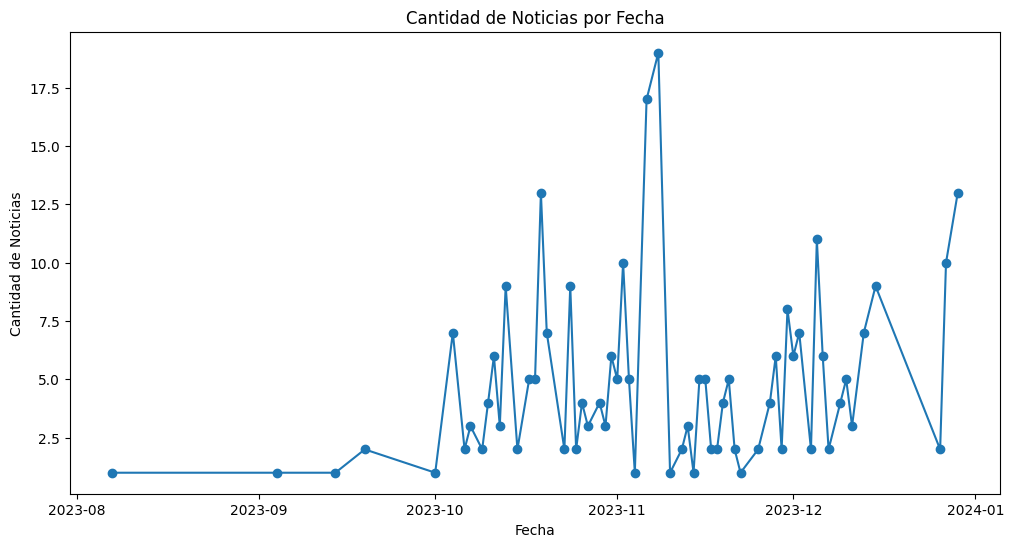

In [12]:
# Noticias por fecha

# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'])
# Se toma en cuenta sólo el día, mes y año de publicación
df['Date'] = df['Date'].dt.date

# Cantidad de noticias por fecha
date_counts = df['Date'].value_counts().sort_index()
print("\nCantidad de noticias por fecha:")
print(date_counts)

# Gráfico de líneas de la cantidad de noticias por fecha
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o')
plt.title('Cantidad de Noticias por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Noticias')
plt.show()


Cantidad de noticias por categoría después de la transformación:
Category
internacionales                  100
nacionales                        80
miradorpolítico                   26
economía                          22
deportes                          20
páginados                         12
salud                              7
cambioclimático                    6
ciencia                            6
opinión                            5
cultura                            5
diariolatinorecomienda             5
tecnología                         4
farándula                          3
editoriales                        3
cienciadiariolatinorecomienda      1
calidaddevida                      1
Name: count, dtype: int64


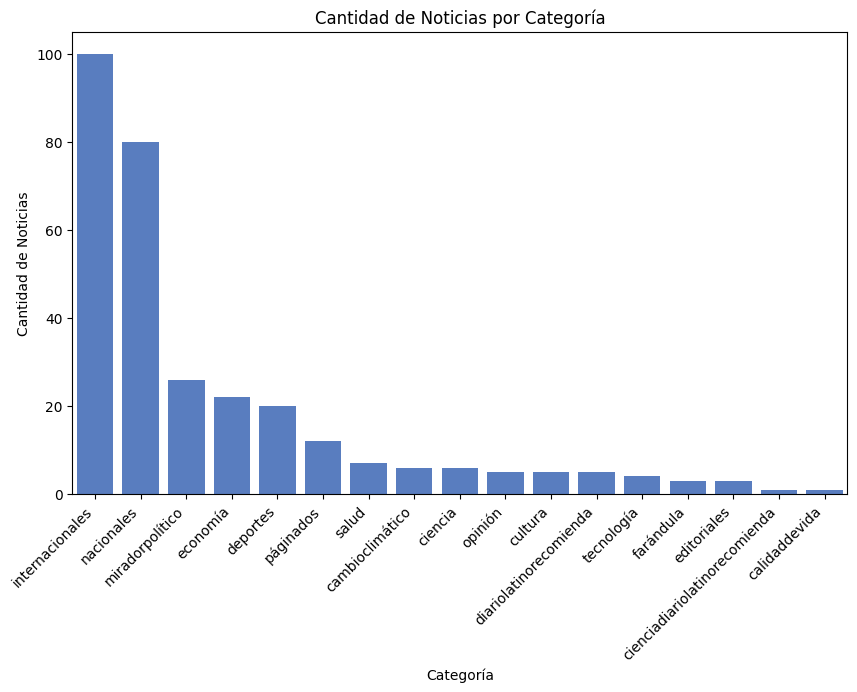

In [13]:
# Noticias por categoría

# Capturando multicategorías (las noticias no tienen más de una categoría pero por si acaso)

# Normalizar las categorías (minúsculas y sin espacios)
df['Category'] = df['Category'].str.lower().str.replace(' ', '')
# Separar categorías en listas
df['Category'] = df['Category'].str.split(',')

# Convertir listas en filas individuales
df = df.explode('Category')

# Eliminar filas duplicadas
df = df.drop_duplicates()

# Cantidad de noticias por categoría después de la transformación
category_counts = df['Category'].value_counts()
print("\nCantidad de noticias por categoría después de la transformación:")
print(category_counts)

# Paleta de colores personalizada
mi_paleta = sns.color_palette("muted")
# Configura la paleta de colores
sns.set_palette(mi_paleta)

# Gráfico de barras de la cantidad de noticias por categoría
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()

In [14]:
# Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print(df.describe())

              Author                                              Title  \
count            306                                                306   
unique             1                                                306   
top     Redacción DL  Acusan a Gobierno de El Salvador de mantener «...   
freq             306                                                  1   

                                                  Content        Date  \
count                                                 306         306   
unique                                                306          63   
top     La Fiscalía atribuye a Mauricio Ramírez Landav...  2023-11-08   
freq                                                    1          19   

                                                      URL         Category  
count                                                 306              306  
unique                                                306               17  
top     https://diariolatin

### Observaciones:

- Como se esperaba aun con las transformaciones la data no ha cambiado

### Otras métricas

- Media y desviación de publicaciones por día

In [15]:
# Calcula la media y desv. en base a la columna 'Date'
media_pub_por_dia = df.groupby('Date')['URL'].nunique().mean()
dev_pub_por_dia = df.groupby('Date')['URL'].nunique().std()

print("Media de publicaciones por día:", round(media_pub_por_dia, 2))
print("Desviación:", round(dev_pub_por_dia, 2))

Media de publicaciones por día: 4.86
Desviación: 3.86
